<a href="https://colab.research.google.com/github/rickielin/IT_5006/blob/main/USA_Univ_Ranking_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This version was released by *Ruikai* on **13 April**.

# (1) Data Preprocessing & Feature Engineering

In data collection, the methods we have used include but are not limited to: drop columns with a missing value ratio greater than 30%, delete useless 'Object' columns such as 'official link', collect each university's ranking of last three years from several recognized rankings, calculate the average ranking range and its deviation for each university, etc. Finally we released this 'ranking_prediction' dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# (Initially screened) dataset import
data = pd.read_csv(r"/content/drive/MyDrive/IT5006/dataset_for_ranking_prediction.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,INSTNM,avg,cat_50,cat_100,cat_200,mean_50,mean_100,mean_200,CITY,STABBR,...,GT_28K_P6,OMAWDP6_FTFT_POOLED_SUPP,OMAWDP8_FTFT_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,OMAWDP8_PELL_FTFT_POOLED_SUPP,OMAWDP8_PELL_FTNFT_POOLED_SUPP,BBRR3_FED_UG_NOPROG,GT_THRESHOLD_P6_SUPP
0,University of Alabama at Birmingham,200,4,2,1,33.062500,48.125000,56.375000,Birmingham,AL,...,0.631,0.5488,0.5828,0.5779,0.5939,0.5203,0.5056,0.5445,0.22,0.6590
1,University of Alabama in Huntsville,708,15,8,4,-17.400000,-42.400000,-2.400000,Huntsville,AL,...,0.649,0.5115,0.5466,0.5380,0.5705,0.4083,0.4447,0.5313,0.19,0.7170
2,The University of Alabama,505,11,6,3,-18.588235,-42.117647,-4.529412,Tuscaloosa,AL,...,0.679,0.6963,0.7139,0.7108,0.7002,0.3929,0.5701,0.5555,0.20,0.7215
3,Auburn University,493,10,5,3,12.900000,32.900000,-21.050000,Auburn,AL,...,0.726,0.7735,0.7934,0.7911,0.7836,0.2899,0.6754,0.7065,0.18,0.7819
4,Samford University,139,3,2,1,0.000000,0.000000,0.000000,Birmingham,AL,...,0.696,0.7593,0.7650,0.7587,0.7375,0.3342,0.6806,0.6604,0.17,0.7220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,The University of Texas MD Anderson Cancer Center,76,2,1,1,2.125000,2.125000,0.000000,Houston,TX,...,0.927,NaN,NaN,NaN,0.9257,NaN,NaN,0.8990,0.25,0.9085
383,University of California-Merced,390,8,4,2,22.833333,56.166667,122.833333,Merced,CA,...,0.645,0.6483,0.6668,0.6669,0.6881,0.4841,0.6495,0.8547,0.15,0.7148
384,Augusta University,382,8,4,2,14.750000,48.083333,96.083333,Augusta,GA,...,0.820,0.2797,0.3303,0.3139,0.4311,0.4751,0.2986,0.4888,0.22,0.5853
385,Kennesaw State University,852,18,9,5,-16.727273,15.090909,-21.272727,Kennesaw,GA,...,NaN,0.4178,0.4708,0.4594,0.5148,0.4385,0.4388,0.5353,0.19,0.7023


## 1.1 Descriptive Statistics

In [ ]:
# Columns' names & Calculate the missing values (387 rows × 94 columns)
data_columns = [x for x in data.columns if x not in []]
print(data_columns)
data.info()

['INSTNM', 'avg', 'cat_50', 'cat_100', 'cat_200', 'mean_50', 'mean_100', 'mean_200', 'CITY', 'STABBR', 'PCIP27', 'AVGFACSAL', 'MD_EARN_WNE_P10', 'MDEARN_PD', 'PCT25_EARN_WNE_P10', 'PCT75_EARN_WNE_P10', 'MD_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'MD_EARN_WNE_P8', 'PCT25_EARN_WNE_P8', 'PCT75_EARN_WNE_P8', 'OMAWDP6_FTFT', 'OMAWDP8_FTFT', 'OMAWDP6_FTNFT', 'OMAWDP8_FTNFT', 'OMAWDP6_FTFT_POOLED', 'OMAWDP8_FTFT_POOLED', 'OMAWDP6_FTNFT_POOLED', 'OMAWDP8_FTNFT_POOLED', 'OMAWDP8_ALL', 'OMAWDP8_FIRSTTIME', 'OMAWDP8_NOTFIRSTTIME', 'OMAWDP8_FULLTIME', 'GT_THRESHOLD_P6', 'MD_EARN_WNE_INC1_P6', 'MD_EARN_WNE_INC2_P6', 'MD_EARN_WNE_INC3_P6', 'MD_EARN_WNE_INDEP1_P6', 'MD_EARN_WNE_INDEP0_P6', 'MD_EARN_WNE_MALE0_P6', 'MD_EARN_WNE_MALE1_P6', 'GT_THRESHOLD_P8', 'MD_EARN_WNE_INC3_P8', 'MD_EARN_WNE_INDEP1_P8', 'MD_EARN_WNE_INDEP0_P8', 'MD_EARN_WNE_MALE0_P8', 'GT_THRESHOLD_P10', 'MD_EARN_WNE_INC1_P10', 'MD_EARN_WNE_INC2_P10', 'MD_EARN_WNE_INDEP1_P10', 'MD_EARN_WNE_INDEP0_P10', 'MD_EARN_WNE_MAL

In [ ]:
# Dtype conversion - identify 12 category type variables
category_columns = ['PREDDEG', 'HIGHDEG', 'REGION', 'LOCALE', 'CCBASIC', 'CCUGPROF',
                    'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'CURROPER', 'ICLEVEL', 'OPENADMP']

for item in category_columns:
    data[item] = data[item].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   INSTNM                          387 non-null    object  
 1   avg                             387 non-null    int64   
 2   cat_50                          387 non-null    int64   
 3   cat_100                         387 non-null    int64   
 4   cat_200                         387 non-null    int64   
 5   mean_50                         387 non-null    float64 
 6   mean_100                        387 non-null    float64 
 7   mean_200                        387 non-null    float64 
 8   CITY                            387 non-null    object  
 9   STABBR                          387 non-null    object  
 10  PCIP27                          387 non-null    float64 
 11  AVGFACSAL                       387 non-null    int64   
 12  MD_EARN_WNE_P10       

We found that there are some missing values in both the category variables and the numerical variables columns. So in 1.3 and 1.4, we performed missing value imputation on them respectively.

## 1.2 KNNImputer for Numeric Missing Values

In [ ]:
# Missing value filling (for numeric variables only)
'''
    KNNImputer - Interpolate with the values of the nearest K data points.
'''
from sklearn.impute import KNNImputer

# Store numeric columns' names
numeric_variables = data.select_dtypes(include=np.number).columns.tolist()

imputer = KNNImputer(n_neighbors=5)

# KNNImputer fit & transform
for col in numeric_variables:
    if data[col].isnull().any(): # columns which have missing values
        data[col] = imputer.fit_transform(data[[col]])

## 1.3 Category Missing Values

In [ ]:
# Missing value filling (for category variables only)
'''
    fill with mode
'''
for col in data.select_dtypes(include=['category']).columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   INSTNM                          387 non-null    object  
 1   avg                             387 non-null    int64   
 2   cat_50                          387 non-null    int64   
 3   cat_100                         387 non-null    int64   
 4   cat_200                         387 non-null    int64   
 5   mean_50                         387 non-null    float64 
 6   mean_100                        387 non-null    float64 
 7   mean_200                        387 non-null    float64 
 8   CITY                            387 non-null    object  
 9   STABBR                          387 non-null    object  
 10  PCIP27                          387 non-null    float64 
 11  AVGFACSAL                       387 non-null    int64   
 12  MD_EARN_WNE_P10       

In [ ]:
# dataset exploration
data.describe()

,avg,cat_50,cat_100,cat_200,mean_50,mean_100,mean_200,PCIP27,AVGFACSAL,MD_EARN_WNE_P10,...,GT_28K_P6,OMAWDP6_FTFT_POOLED_SUPP,OMAWDP8_FTFT_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,OMAWDP8_PELL_FTFT_POOLED_SUPP,OMAWDP8_PELL_FTNFT_POOLED_SUPP,BBRR3_FED_UG_NOPROG,GT_THRESHOLD_P6_SUPP
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,393.268734,8.338501,4.403101,2.524548,1.612778,3.970549,3.865818,0.013975,10237.041344,57995.227390,...,0.690927,0.634669,0.655119,0.645386,0.686210,0.473824,0.596895,0.670110,0.183437,0.726014
std,272.046790,5.469808,2.725392,1.349071,12.289417,21.932020,40.471110,0.016487,2716.383497,13916.463286,...,0.107205,0.172288,0.164856,0.173504,0.150196,0.175211,0.176151,0.140094,0.042613,0.099790
min,2.000000,1.000000,1.000000,1.000000,-28.400000,-49.250000,-102.666667,0.000000,3405.000000,21276.000000,...,0.178000,0.092200,0.106000,0.038000,0.298000,0.023000,0.090600,0.277500,0.050000,0.275000
25%,204.000000,5.000000,3.000000,2.000000,-7.000000,-3.375000,-10.435606,0.005200,8388.000000,47862.500000,...,0.625000,0.512250,0.541650,0.530300,0.578650,0.352300,0.467800,0.571200,0.160000,0.671100
50%,298.000000,6.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.009100,9824.000000,55360.000000,...,0.690000,0.634669,0.655119,0.645386,0.680900,0.473824,0.585800,0.659900,0.190000,0.728000
75%,549.000000,11.000000,6.000000,3.000000,9.000000,15.121429,10.250000,0.017300,11566.000000,66295.500000,...,0.760500,0.768850,0.781100,0.777350,0.801150,0.593650,0.728100,0.770350,0.210000,0.798900
max,1201.000000,25.000000,13.000000,7.000000,33.062500,66.200000,122.833333,0.132500,21143.000000,103246.000000,...,0.962000,0.969200,0.977900,0.977900,0.977100,0.959200,0.967600,1.000000,0.310000,0.938200


This table inspired us to proceed with following 1.3 and 1.4.

## 1.4 Outlier Handling & Z-score Normalization

In [ ]:
# Numeric Data ONLY

# Normalization & Outlier handling (except targer columns)
'''
    1. RobustScaler - remove the median and scale the data according to the quantile range (default is IQR: interquartile range)
    2. StandardScaler - Z-score normalization
'''
from sklearn.preprocessing import RobustScaler, StandardScaler

# Split targer, 'Object', and category columns
non_numeric_columns = ['avg', 'cat_50', 'cat_100', 'cat_200', 'mean_50', 'mean_100',
                       'mean_200', 'INSTNM', 'CITY', 'STABBR'] + category_columns
non_numeric_df = data.loc[:, non_numeric_columns]
data = data.drop(columns = non_numeric_columns)

# RobustScaler - Remove outliers
robust_transformer = RobustScaler().fit(data)
robust_transformer.transform(data)

# Standard Scaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-0.010624,0.421310,-0.791830,0.0,-0.714909,-0.739781,-0.772048,-0.703726,-0.630936,-0.725891,...,-5.597173e-01,-0.499050,-0.439247,-0.389462,-0.615393,2.656013e-01,-5.189513e-01,-0.897770,0.859140,-0.672421
1,0.007596,-0.199066,-0.261484,0.0,-0.442769,-0.100070,-0.056092,-0.360204,0.025949,-0.338984,...,-3.915978e-01,-0.715828,-0.659118,-0.619727,-0.771392,-3.744550e-01,-8.651255e-01,-0.992114,0.154220,-0.090449
2,-0.368949,0.041269,-0.377324,0.0,-0.281872,-0.251263,-0.320221,-0.248225,-0.361663,-0.430770,...,-1.113986e-01,0.358185,0.357024,0.377507,0.093265,-4.624627e-01,-1.523135e-01,-0.819150,0.389193,-0.045296
3,-0.271776,0.178762,-0.076428,0.0,-0.025280,0.009578,0.131259,0.253903,0.012937,0.036697,...,3.275801e-01,0.806853,0.839888,0.840921,0.649259,-1.051086e+00,4.462440e-01,0.260091,-0.080753,0.560758
4,-0.721201,-0.453409,-0.343363,0.0,-0.239341,-0.060210,-0.208174,-0.172227,-0.454531,-0.514096,...,4.738090e-02,0.724326,0.667393,0.653940,0.341929,-7.979207e-01,4.758023e-01,-0.069399,-0.315726,-0.040279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,-0.848741,0.481025,2.001930,0.0,3.321553,1.178215,1.993594,3.393336,0.931729,1.832487,...,2.204915e+00,0.000000,0.000000,0.000000,1.596581,3.172344e-16,-6.310848e-16,1.635944,1.564060,1.831064
383,0.390214,0.594558,0.226843,0.0,0.481886,0.243087,-0.339372,-0.349067,-0.256459,0.003888,...,-4.289577e-01,0.079221,0.070949,0.124159,0.012599,5.872596e-02,2.990204e-01,1.319320,-0.785673,-0.112524
384,-0.405389,-0.478106,-1.121507,0.0,-1.212546,-1.027226,-1.087218,-1.126552,-0.907697,-1.113668,...,1.205538e+00,-2.062995,-1.972874,-1.913014,-1.700714,7.292866e-03,-1.695603e+00,-1.295874,0.859140,-1.411928
385,-0.539002,-0.764887,-0.446324,0.0,-0.377066,-0.321598,-0.427242,-0.456884,-0.291629,-0.440652,...,1.036945e-15,-1.260390,-1.119509,-1.073329,-1.142721,-2.018684e-01,-8.986629e-01,-0.963525,0.154220,-0.237949


## 1.5 Analysis of Variance

In [ ]:
'''
    Analysis of Variance (ANOVA)
'''
from statsmodels.formula.api import ols

model = ols("non_numeric_df[['avg']] ~ data[data.columns]", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
data[data.columns],1.110326e+07,72.0,2.71217,2.402371e-09
Residual,1.808124e+07,318.0,NaN,NaN


The value of F is large, while the value of PR(>F) is small, indicating that the difference between groups is very significant.

## 1.6 Map Data to Normal Distributions

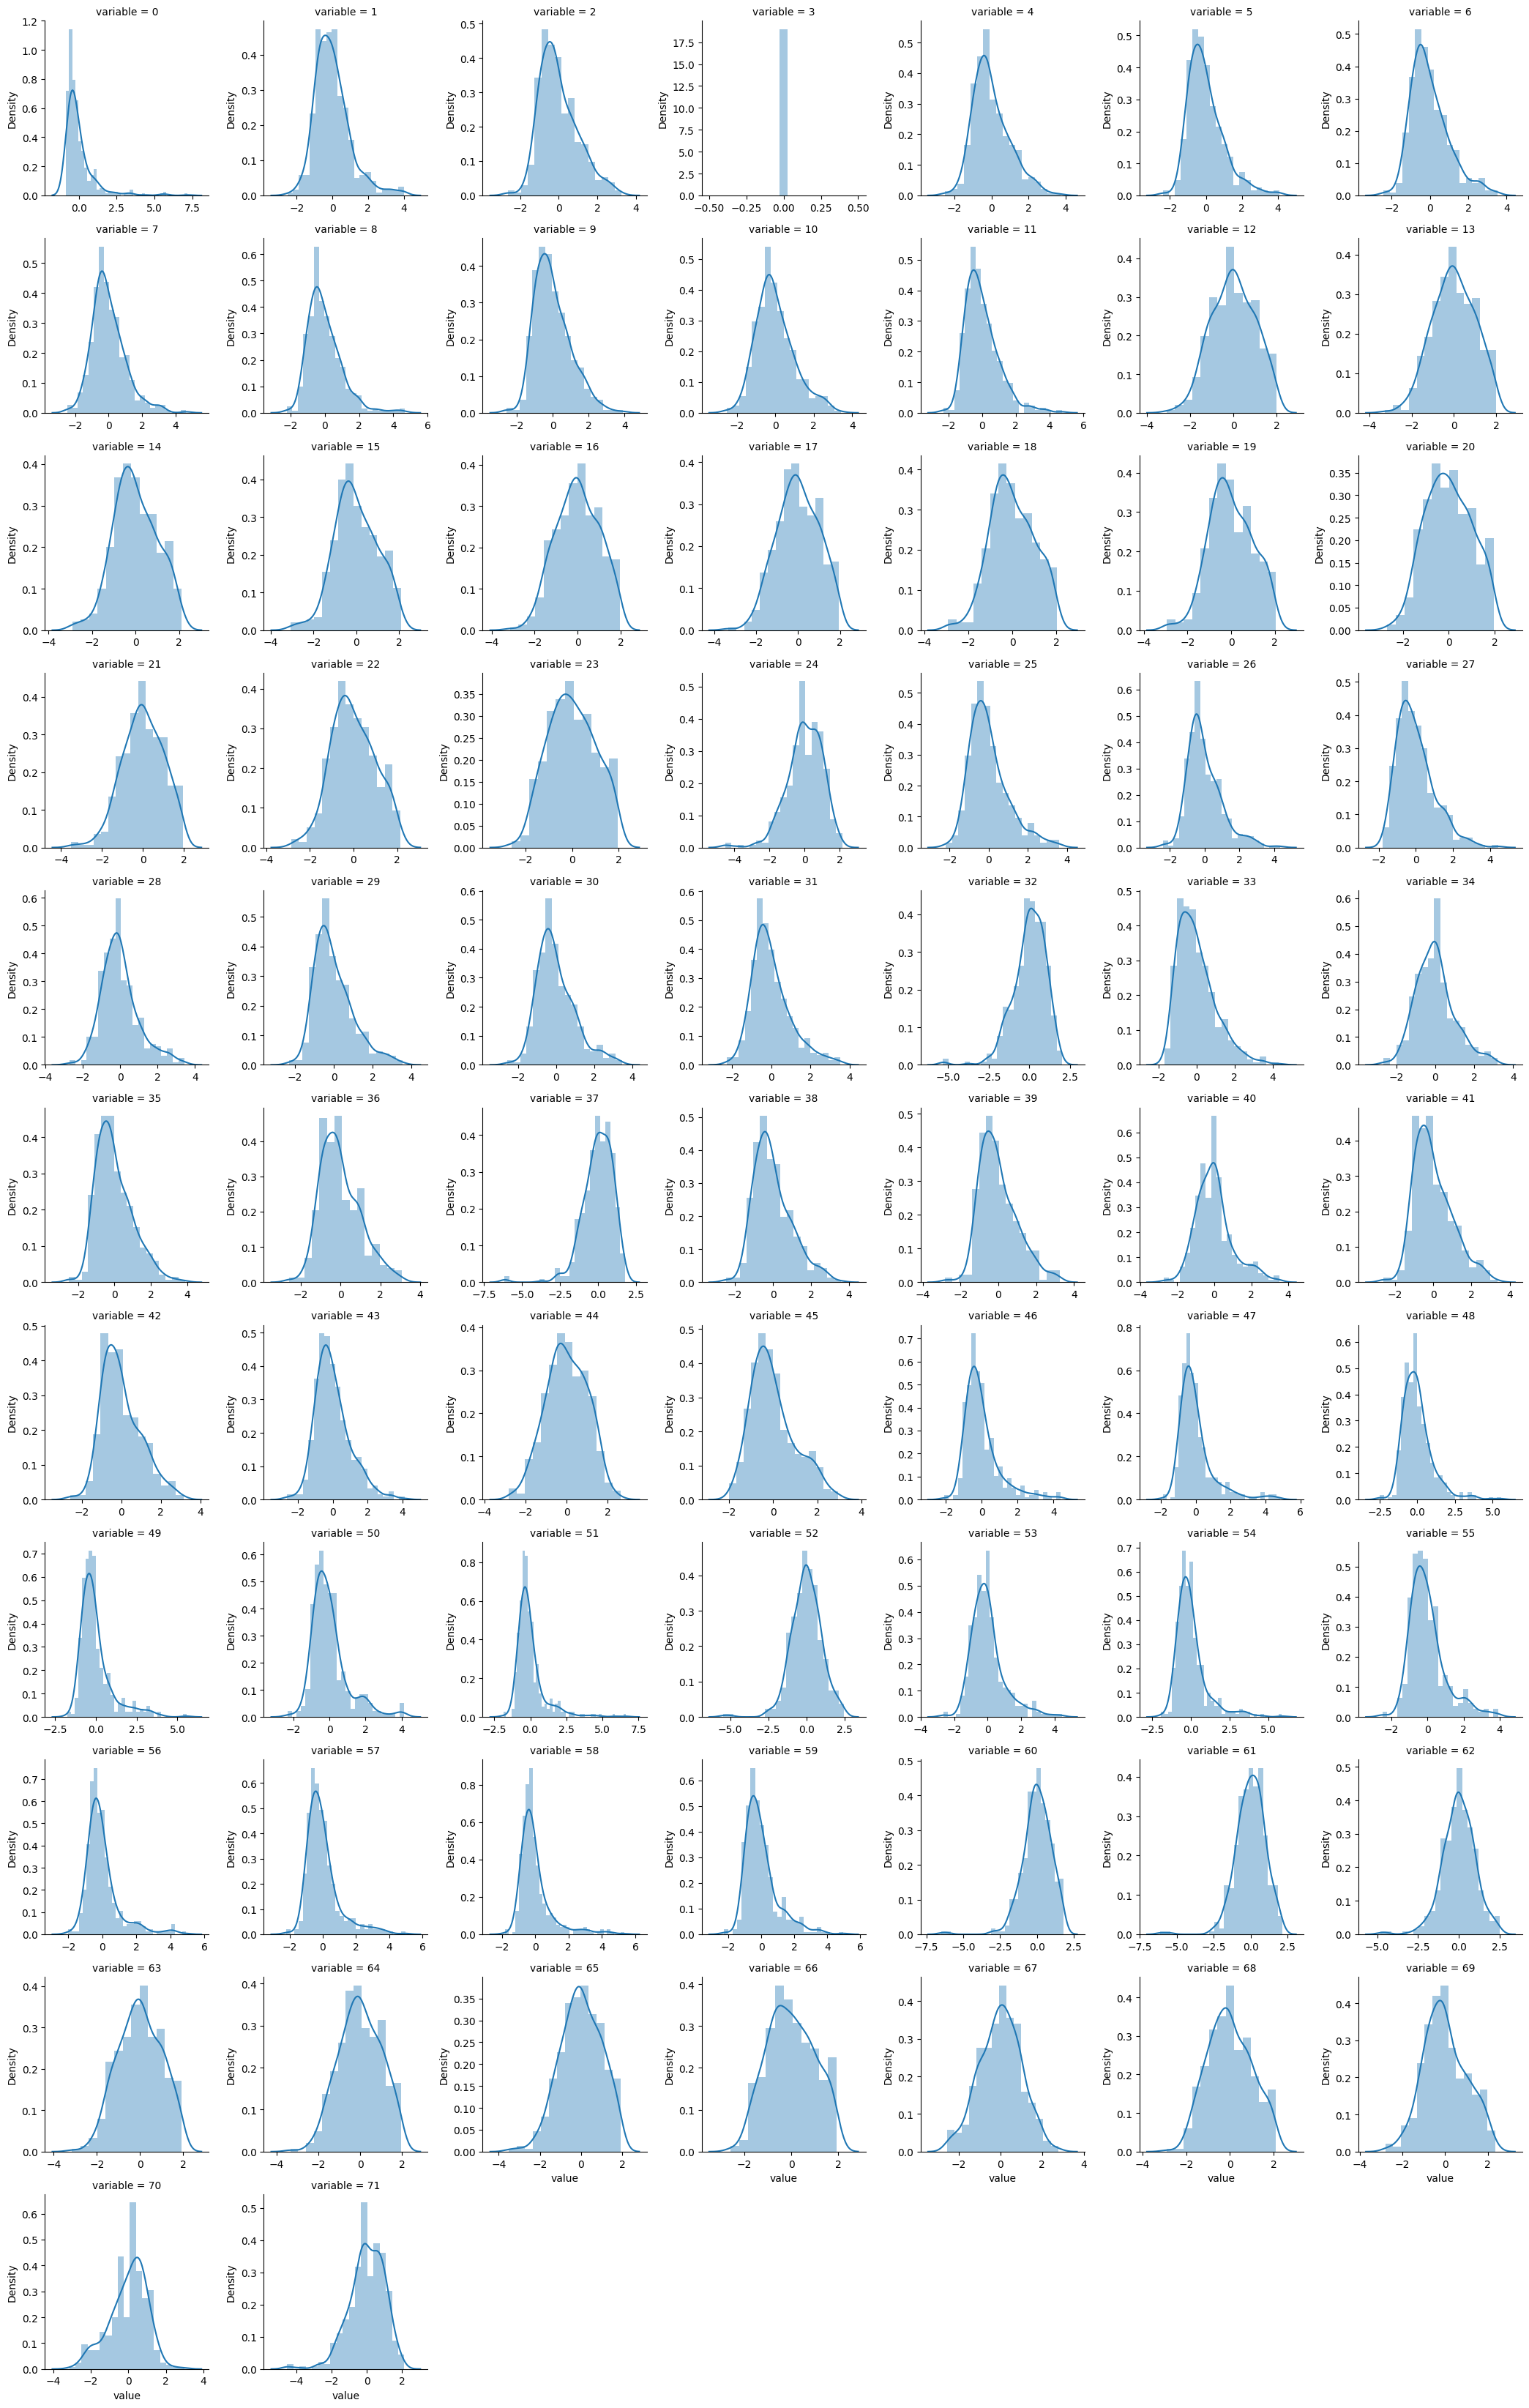

In [ ]:
# Distributions Observation!

quantitative = [f for f in data]
f = pd.melt(data, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=7, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
# An abnormal column is observed, drop it! (the column 'variable = 3')
data = data.drop(3, axis=1)

In [ ]:
'''
    Shapiro-Wilk
        - just initial inspection!
        - Used to test whether the data obey the normal distribution
'''
from scipy.stats import shapiro

# record columns that may not follow a normal distribution
cols_to_transform = []

# normal distribution checking for each columns
for column in data.columns:
    stat, p = shapiro(data[column])
    alpha = 0.2
    if p > alpha:
        # likely to follow a normal distribution
        pass
    else:
        # Does not follow normal distribution
        cols_to_transform.append(column)

print(cols_to_transform)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71]


Shapiro-Wilk can be overly sensitive at larger sample sizes, causing small deviations from a normal distribution to be considered significant. We discovered this situation and went on to use other methods to judge the normal distribution.

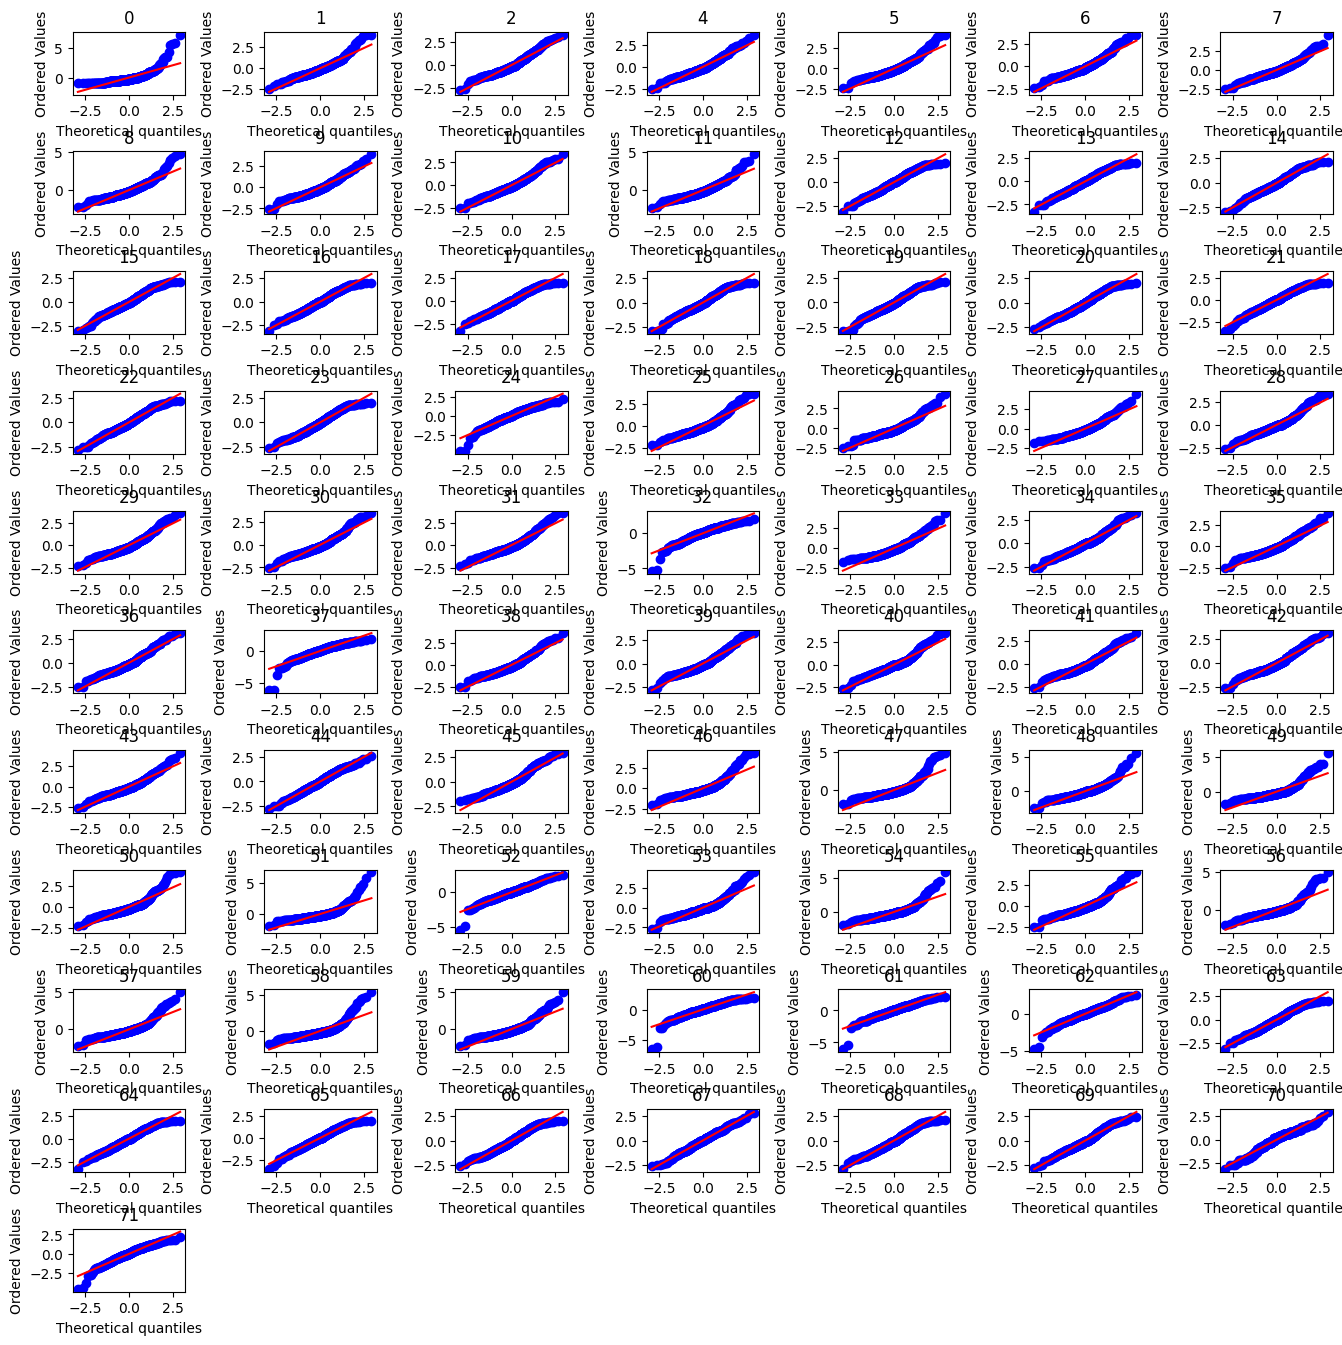

In [ ]:
'''
    Q-Q Plots
        - If the data deviates from a normal distribution, the Q-Q plot will show some obvious curves or deviations.
'''
from scipy import stats

def qq_plot(data):
    # 计算子图的行数和列数
    n_cols = 7
    n_rows = int(np.ceil(data.shape[1] / n_cols))

    # 创建一个大图和子图
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 14))
    axs = axs.ravel()  # 将子图展开成一维数组

    # 遍历DataFrame的每一列并绘制QQ图
    for i, col in enumerate(data.columns):
        ax = axs[i]
        stats.probplot(data[col], dist='norm', plot=ax)
        ax.set_title(col)  # 添加子图标题

    # 删除多余的子图
    for i in range(data.shape[1], len(axs)):
        fig.delaxes(axs[i])

    # 调整子图的间距和边缘
    fig.subplots_adjust(wspace=0.7, hspace=0.9, top=0.95, bottom=0.05, left=0.05, right=0.95)
    plt.show()

qq_plot(data)

From density histograms and Q-Q plots, we observed that **[0,8,11,26,32,33,37,46,47,48,49,50,51,53,54,56,57,58]** may need to be transformed to Normal Distribution. Then we used Yeo-Johnson transform and quantile transformation to do it!

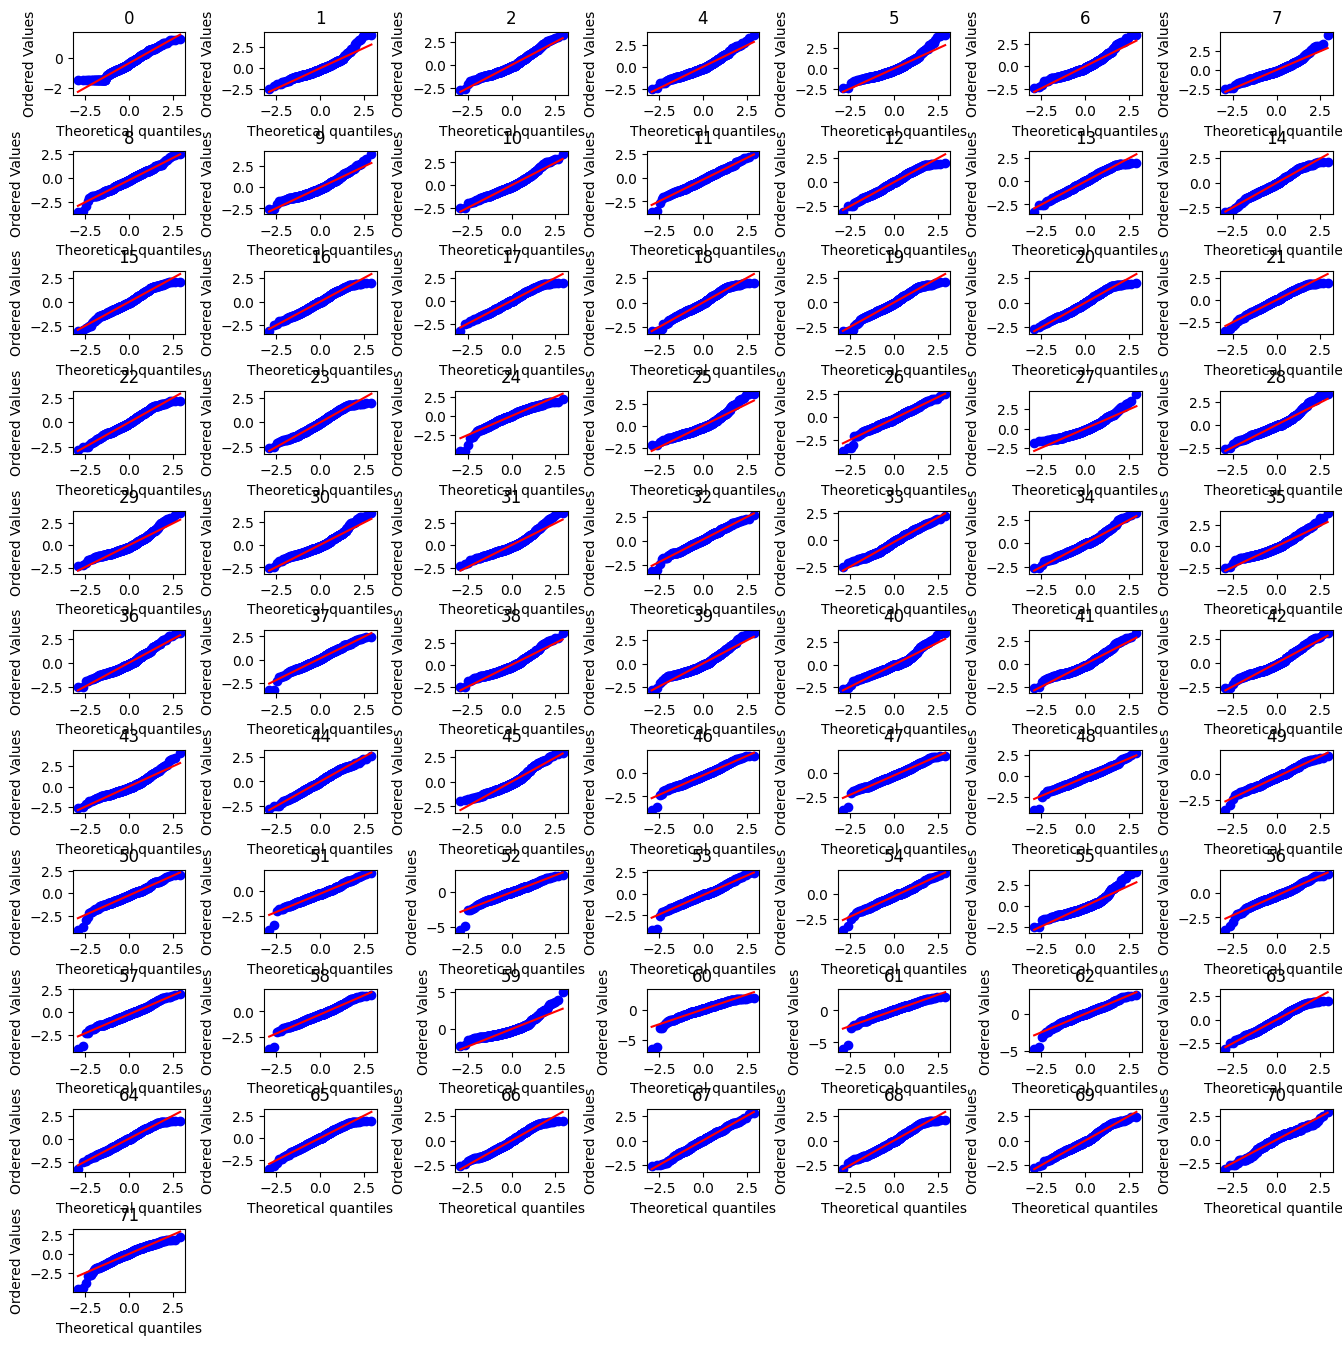

In [ ]:
'''
    Map data to Normal Distribution
        1. Yeo-Johnson transform
        2. (Alternative) Quantile transformation
'''
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

cols_to_transform = [0,8,11,26,32,33,37,46,47,48,49,50,51,53,54,56,57,58]

# Yeo-Johnson transform
for col in cols_to_transform:
    if col in data.columns:
        transformer = PowerTransformer(method='yeo-johnson', standardize=False)
        data[[col]] = transformer.fit_transform(data[[col]])

# drawing for observation
qq_plot(data)

Comparing above two Q-Q plots, it is easy to see that our data has basically been normal distribution after Yeo-Johnson transform!

## 1.7 Pearson Correlation Coefficient

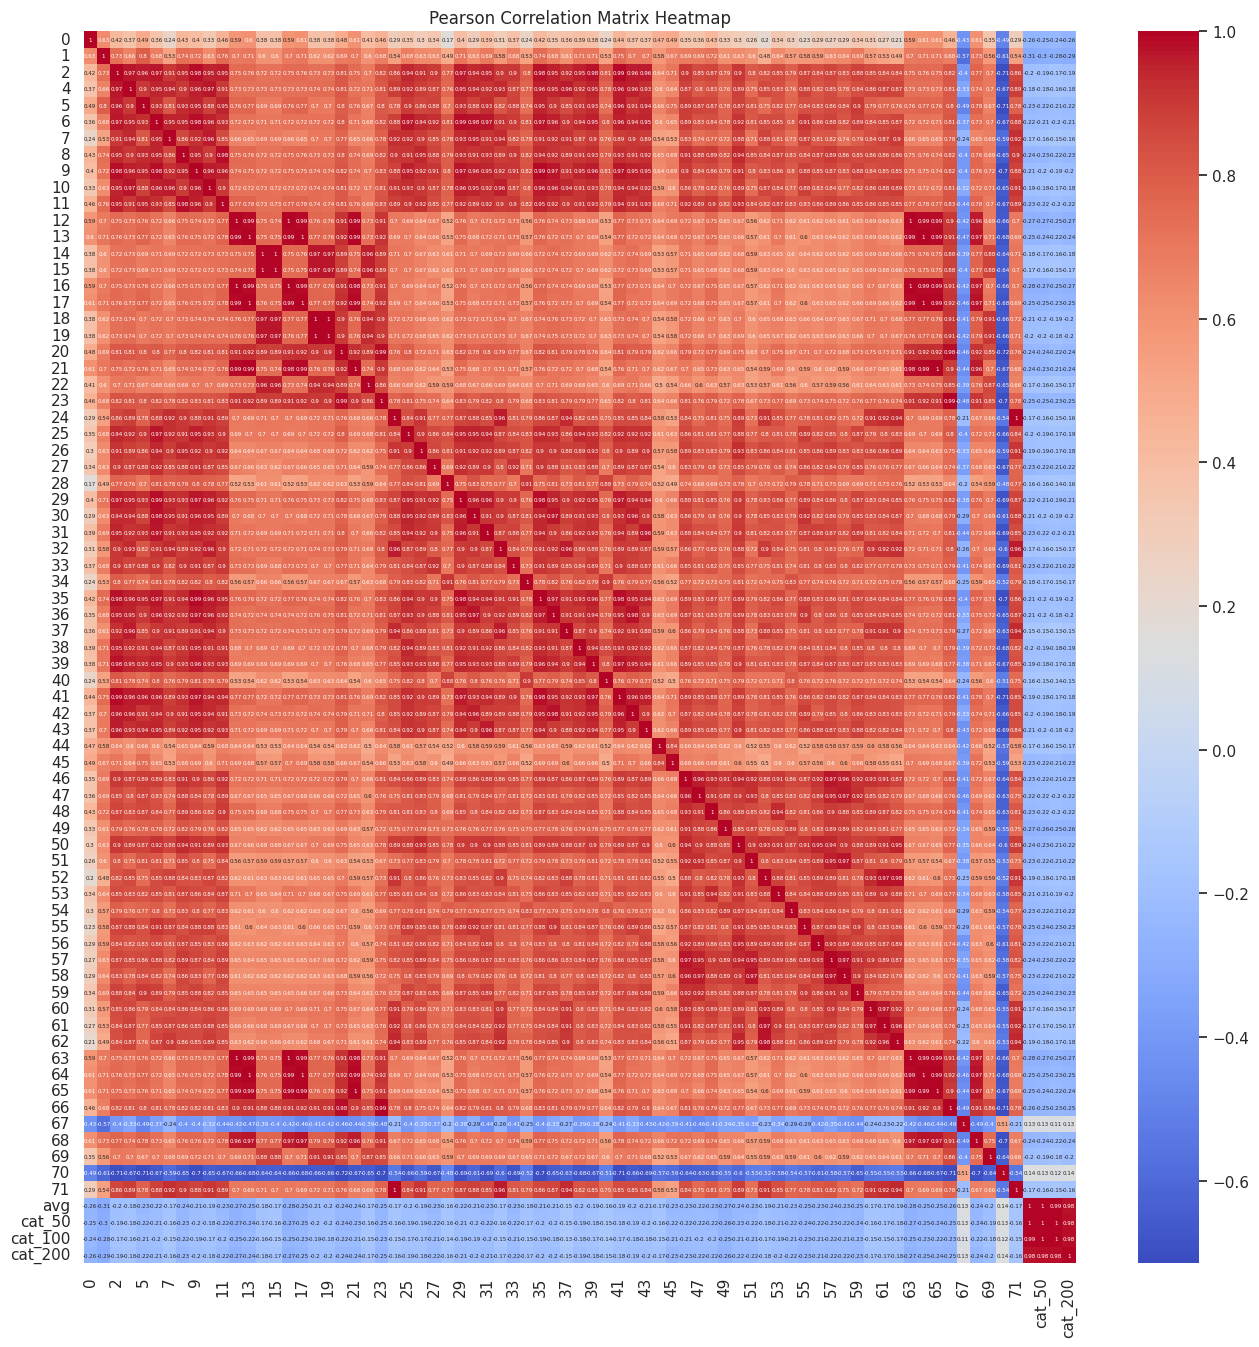

In [ ]:
'''
    Pearson correlation coefficient (PCC)
'''
# Heatmap! Collinearity is considered when abs(PCC) > 0.7.
# Pls note that the columns considered as multicollinearity will be further judged using VIF next!
pcc_columns = pd.concat([data,
                         non_numeric_df.loc[:, ['avg', 'cat_50', 'cat_100', 'cat_200']]], axis=1)
pcc_corr = pcc_columns.corr()

sns.set(font_scale=1.0)
plt.figure(figsize=(16, 16))

sns.heatmap(pcc_corr, annot=True, annot_kws={"size": 4}, cmap='coolwarm')
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

## 1.8 Variance Inflation Factor

Generally speaking, when the correlation coefficient is greater than 0.7 or 0.8, there may be a problem of multicollinearity, which needs to be confirmed by calculating VIF.

In [ ]:
'''
    VIF - for multicollinearity variables
    VIF can be used to measure the influence of each variable on the regression coefficient.
    If the VIF value exceeds 10, it indicates that there is a high degree of collinearity.
'''
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_cols = [63,12,64,13,16,17,65,21,71,24]
vif_cols = data[vif_cols]

vif = pd.DataFrame()
vif["variables"] = vif_cols.columns
vif["VIF"] = [variance_inflation_factor(vif_cols.values, i) for i in range(vif_cols.shape[1])]

print("VIF results:\n", vif)

VIF results:
    variables          VIF
0         63          inf
1         12  1749.415956
2         64          inf
3         13  3017.123756
4         16          inf
5         17          inf
6         65  2117.716153
7         21  2055.085098
8         71          inf
9         24          inf


Very happy with this result! 👆
However, we may need to use some methods to reduce collinearity. Lasso is coming 👇

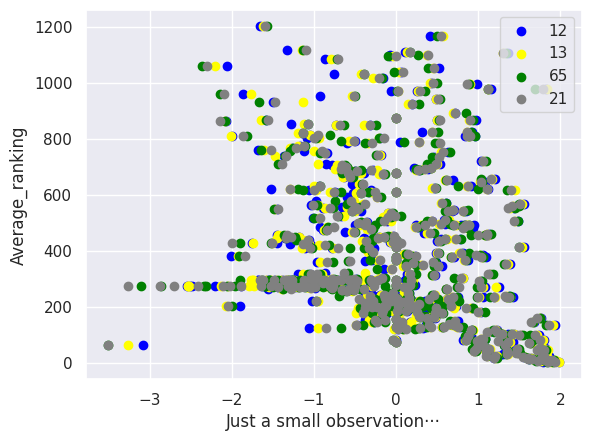

In [ ]:
# Scatter plot for visual observation
fig, ax = plt.subplots()

ax.scatter(data[12],non_numeric_df['avg'], c="Blue", label="12")
ax.scatter(data[13],non_numeric_df['avg'], c="Yellow", label="13")
ax.scatter(data[65],non_numeric_df['avg'], c="Green", label="65")
ax.scatter(data[21],non_numeric_df['avg'], c="gray", label="21")

ax.set_xlabel("Just a small observation···")
ax.set_ylabel('Average_ranking')
ax.legend(loc = 'upper right')
ax.grid(True)
plt.show()

OMG don't know why they are so much alike!

## 1.9 Lasso Regression

The size of the Lasso regression coefficient indicates the contribution of the feature to the response variable, i.e., the influence of the feature on the prediction result. The larger the absolute value of the coefficient, the greater the influence of the feature.

In [ ]:
'''
    Lasso Regression
        Selecting the most relevant subset among a set of potentially relevant independent
        variables, while reducing the coefficients of other irrelevant independent variables
        (shrinkage), makes the model simpler and more generalizable. Only some independent
        variables that are most correlated with the target variable are retained, while the
        coefficients of other independent variables are reduced to zero, so as to achieve the
        purpose of reducing collinearity.
'''
from sklearn.linear_model import Lasso

def lasso_try(data):
    X = data
    y = non_numeric_df['avg']

    lasso = Lasso(alpha=0.1, max_iter=1000)
    lasso.fit(X, y)

    # Print the fitted coefficients of the Lasso model
    coef = pd.Series(lasso.coef_, index=X.columns)
    return coef

coef = lasso_try(data)
print("Lasso coefficients:\n")
pd.DataFrame(coef)

Lasso coefficients:



,0
0,-95.399186
1,-99.356449
2,-320.485054
4,-222.888715
5,102.690920
...,...
67,-1.703838
68,73.545662
69,-89.573736
70,-21.163403


In [ ]:
# drop the columns which meet Lasso_coefficient = 0
# data = data.drop(14, axis=1)
# data = data.drop(39, axis=1)

In [ ]:
# Store columns with abs(Lasso_coefficient) >= 100

selected_features = coef[abs(coef) >= 100].index.tolist()
lasso_selected_data = data[selected_features]
lasso_selected_columns = [x for x in lasso_selected_data.columns if x not in []]
lasso_selected_data

,2,4,5,8,9,12,13,15,19,23,...,41,46,49,51,52,55,58,61,63,71
0,-0.791830,-0.714909,-0.739781,-0.745572,-0.725891,-3.902305e-01,-0.347354,-0.754835,-0.729568,-0.568888,...,-0.809060,-0.799496,-3.613764e-01,-0.490010,-0.499602,-0.499679,-6.456470e-01,-6.804870e-01,-0.499050,-0.672421
1,-0.261484,-0.442769,-0.100070,0.025744,-0.338984,-7.839516e-01,-0.721278,-0.798603,-0.855415,-0.786130,...,-0.286651,-0.513653,-6.432629e-01,-0.256634,-0.335487,-0.596439,-3.528467e-01,-4.176387e-01,-0.715828,-0.090449
2,-0.377324,-0.281872,-0.251263,-0.400366,-0.430770,4.384699e-01,0.426408,-0.412721,-0.448436,0.165819,...,-0.345216,-0.543789,-9.524505e-01,-0.792694,-0.232915,-0.519031,-5.079997e-01,-2.862145e-01,0.358185,-0.045296
3,-0.076428,-0.025280,0.009578,0.012886,0.036697,8.257075e-01,0.855864,0.232118,0.310326,0.645503,...,-0.081247,-0.215581,-3.111330e-01,-0.441795,0.238914,-0.344863,-3.663607e-01,2.942422e-01,0.806853,0.560758
4,-0.343363,-0.239341,-0.060210,-0.515071,-0.514096,7.249196e-01,0.651626,-1.190320,-0.898100,0.285909,...,-0.306433,-0.008361,7.366967e-02,-0.097993,0.208143,0.342132,-2.515139e-02,1.409140e-01,0.724326,-0.040279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2.001930,3.321553,1.178215,0.748818,1.832487,6.543686e-16,0.000000,1.844215,1.595291,1.853149,...,1.779234,1.017241,-2.139276e-16,-0.000000,2.351890,2.190245,-4.148535e-16,2.068468e+00,0.000000,1.831064
383,0.226843,0.481886,0.243087,-0.276144,0.003888,9.838444e-02,0.093209,1.188434,1.016836,0.035609,...,0.249372,0.000000,-2.139276e-16,-0.000000,-1.125289,-0.306159,-4.148535e-16,2.431835e-15,0.079221,-0.112524
384,-1.121507,-1.212546,-1.027226,-1.139077,-1.113668,-2.016982e+00,-1.925113,-1.004309,-1.114469,-1.664540,...,-1.201860,0.466173,3.404633e-01,-0.000000,1.439003,0.951719,-4.148535e-16,1.553724e+00,-2.062995,-1.411928
385,-0.446324,-0.377066,-0.321598,-0.316986,-0.440652,-1.276103e+00,-1.127287,-1.037135,-1.049706,-1.152471,...,-0.420302,0.000000,-2.139276e-16,-0.000000,0.000000,0.000000,-4.148535e-16,2.431835e-15,-1.260390,-0.237949


## 1.10 Kernel PCA

Perform PCA on all variables that were not selected into the new dataset after Lasso.

In [ ]:
pca_raw_data = data.drop(columns = lasso_selected_columns)
pca_raw_data

,0,1,6,7,10,11,14,16,17,18,...,59,60,62,64,65,66,67,68,69,70
0,-0.010710,0.421310,-0.772048,-0.703726,-0.661652,-0.808037,-0.784673,-0.499050,-0.439247,-0.798512,...,-0.591360,-0.667610,-5.597173e-01,-0.439247,-0.389462,-0.615393,2.656013e-01,-5.189513e-01,-0.897770,0.859140
1,0.007552,-0.199066,-0.056092,-0.360204,-0.618381,-0.138252,-0.852135,-0.715828,-0.659118,-0.898598,...,-0.188046,-0.314370,-3.915978e-01,-0.659118,-0.619727,-0.771392,-3.744550e-01,-8.651255e-01,-0.992114,0.154220
2,-0.478103,0.041269,-0.320221,-0.248225,-0.313343,-0.421832,-0.398363,0.358185,0.357024,-0.426053,...,-0.400316,-0.192563,-1.113986e-01,0.357024,0.377507,0.093265,-4.624627e-01,-1.523135e-01,-0.819150,0.389193
3,-0.330142,0.178762,0.131259,0.253903,0.182696,0.020419,0.230810,0.806853,0.839888,0.307428,...,-0.223424,0.270303,3.275801e-01,0.839888,0.840921,0.649259,-1.051086e+00,4.462440e-01,0.260091,-0.080753
4,-1.159401,-0.453409,-0.208174,-0.172227,-0.323147,-0.237494,-1.083636,0.724326,0.667393,-0.793508,...,0.370934,0.075412,4.738090e-02,0.667393,0.653940,0.341929,-7.979207e-01,4.758023e-01,-0.069399,-0.315726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,-1.465785,0.481025,1.993594,3.393336,2.852879,0.912870,1.724208,0.000000,0.000000,1.557778,...,0.000000,1.622360,2.204915e+00,0.000000,0.000000,1.596581,3.172344e-16,-6.310848e-16,1.635944,1.564060
383,0.303153,0.594558,-0.339372,-0.349067,-0.103974,0.034912,1.232090,0.079221,0.070949,1.048774,...,0.000000,0.000000,-4.289577e-01,0.070949,0.124159,0.012599,5.872596e-02,2.990204e-01,1.319320,-0.785673
384,-0.537880,-0.478106,-1.087218,-1.126552,-1.178651,-1.190476,-0.962915,-2.062995,-1.972874,-1.099483,...,0.000000,1.074229,1.205538e+00,-1.972874,-1.913014,-1.700714,7.292866e-03,-1.695603e+00,-1.295874,0.859140
385,-0.777754,-0.764887,-0.427242,-0.456884,-0.419380,-0.411817,-1.134766,-1.260390,-1.119509,-1.120930,...,0.000000,0.000000,1.036945e-15,-1.119509,-1.073329,-1.142721,-2.018684e-01,-8.986629e-01,-0.963525,0.154220


In [ ]:
'''
    Kernel PCA
'''
from sklearn.decomposition import KernelPCA

def kernel_pca(df_data, n_components = 8):
    kpca = KernelPCA(n_components=n_components, kernel='rbf')
    X_kpca = kpca.fit_transform(df_data, n_components)
    columns = ['PC{}'.format(i+1) for i in range(n_components)]
    df_kpca = pd.DataFrame(X_kpca, columns=columns)
    return df_kpca

# K-PCA implementation
# n_components = int(0.9 * len(data.columns))  # 保留30%
pca_data = kernel_pca(pca_raw_data)

pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.503201,-0.116682,0.001538,0.087006,-0.100437,-0.101826,-0.025815,-0.058360
1,-0.294488,-0.265735,0.294148,0.020178,-0.194993,0.081657,0.059388,-0.062125
2,-0.152344,-0.428344,-0.086370,0.135719,-0.018756,0.010053,-0.150927,-0.215561
3,0.323246,-0.410954,-0.209189,-0.084530,0.005746,0.107879,-0.027028,-0.135912
4,0.051791,-0.342547,-0.024857,0.045943,-0.026381,0.189670,-0.233201,-0.132937
...,...,...,...,...,...,...,...,...
382,0.316375,0.384789,0.201288,0.135931,0.365269,0.007435,0.164158,-0.132971
383,0.242100,-0.345502,-0.183947,-0.024606,0.018573,0.150830,0.248774,0.135492
384,-0.298028,0.208821,0.253672,-0.024947,-0.196820,0.196406,0.112659,-0.100533
385,-0.372951,-0.129860,0.378365,-0.000821,-0.266054,0.109340,0.076463,-0.070874


In [ ]:
# Merge Lasso_selected columns and new principal components made by K-PCA
new_numeric_data = pd.concat([pca_data, lasso_selected_data], axis=1)
new_numeric_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,2,4,...,41,46,49,51,52,55,58,61,63,71
0,-0.503201,-0.116682,0.001538,0.087006,-0.100437,-0.101826,-0.025815,-0.058360,-0.791830,-0.714909,...,-0.809060,-0.799496,-3.613764e-01,-0.490010,-0.499602,-0.499679,-6.456470e-01,-6.804870e-01,-0.499050,-0.672421
1,-0.294488,-0.265735,0.294148,0.020178,-0.194993,0.081657,0.059388,-0.062125,-0.261484,-0.442769,...,-0.286651,-0.513653,-6.432629e-01,-0.256634,-0.335487,-0.596439,-3.528467e-01,-4.176387e-01,-0.715828,-0.090449
2,-0.152344,-0.428344,-0.086370,0.135719,-0.018756,0.010053,-0.150927,-0.215561,-0.377324,-0.281872,...,-0.345216,-0.543789,-9.524505e-01,-0.792694,-0.232915,-0.519031,-5.079997e-01,-2.862145e-01,0.358185,-0.045296
3,0.323246,-0.410954,-0.209189,-0.084530,0.005746,0.107879,-0.027028,-0.135912,-0.076428,-0.025280,...,-0.081247,-0.215581,-3.111330e-01,-0.441795,0.238914,-0.344863,-3.663607e-01,2.942422e-01,0.806853,0.560758
4,0.051791,-0.342547,-0.024857,0.045943,-0.026381,0.189670,-0.233201,-0.132937,-0.343363,-0.239341,...,-0.306433,-0.008361,7.366967e-02,-0.097993,0.208143,0.342132,-2.515139e-02,1.409140e-01,0.724326,-0.040279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.316375,0.384789,0.201288,0.135931,0.365269,0.007435,0.164158,-0.132971,2.001930,3.321553,...,1.779234,1.017241,-2.139276e-16,-0.000000,2.351890,2.190245,-4.148535e-16,2.068468e+00,0.000000,1.831064
383,0.242100,-0.345502,-0.183947,-0.024606,0.018573,0.150830,0.248774,0.135492,0.226843,0.481886,...,0.249372,0.000000,-2.139276e-16,-0.000000,-1.125289,-0.306159,-4.148535e-16,2.431835e-15,0.079221,-0.112524
384,-0.298028,0.208821,0.253672,-0.024947,-0.196820,0.196406,0.112659,-0.100533,-1.121507,-1.212546,...,-1.201860,0.466173,3.404633e-01,-0.000000,1.439003,0.951719,-4.148535e-16,1.553724e+00,-2.062995,-1.411928
385,-0.372951,-0.129860,0.378365,-0.000821,-0.266054,0.109340,0.076463,-0.070874,-0.446324,-0.377066,...,-0.420302,0.000000,-2.139276e-16,-0.000000,0.000000,0.000000,-4.148535e-16,2.431835e-15,-1.260390,-0.237949


In [ ]:
# Add non_numeric_columns back to 'data' dataframe
data = pd.concat([data, non_numeric_df], axis=1)
data

,0,1,2,4,5,6,7,8,9,10,...,REGION,LOCALE,CCBASIC,CCUGPROF,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CURROPER,ICLEVEL,OPENADMP
0,-0.010710,0.421310,-0.791830,-0.714909,-0.739781,-0.772048,-0.703726,-0.745572,-0.725891,-0.661652,...,5,12,15,9,0,0,0,1,1,2.0
1,0.007552,-0.199066,-0.261484,-0.442769,-0.100070,-0.056092,-0.360204,0.025744,-0.338984,-0.618381,...,5,12,16,15,0,0,0,1,1,2.0
2,-0.478103,0.041269,-0.377324,-0.281872,-0.251263,-0.320221,-0.248225,-0.400366,-0.430770,-0.313343,...,5,12,15,14,0,0,0,1,1,2.0
3,-0.330142,0.178762,-0.076428,-0.025280,0.009578,0.131259,0.253903,0.012886,0.036697,0.182696,...,5,13,15,14,0,0,0,1,1,2.0
4,-1.159401,-0.453409,-0.343363,-0.239341,-0.060210,-0.208174,-0.172227,-0.515071,-0.514096,-0.323147,...,5,21,17,14,0,0,0,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,-1.465785,0.481025,2.001930,3.321553,1.178215,1.993594,3.393336,0.748818,1.832487,2.852879,...,6,11,26,7,0,0,0,1,1,2.0
383,0.303153,0.594558,0.226843,0.481886,0.243087,-0.339372,-0.349067,-0.276144,0.003888,-0.103974,...,8,41,16,12,0,0,0,1,1,2.0
384,-0.537880,-0.478106,-1.121507,-1.212546,-1.027226,-1.087218,-1.126552,-1.139077,-1.113668,-1.178651,...,5,12,17,11,0,0,0,1,1,2.0
385,-0.777754,-0.764887,-0.446324,-0.377066,-0.321598,-0.427242,-0.456884,-0.316986,-0.440652,-0.419380,...,5,21,16,9,0,0,0,1,1,2.0


From 1.4 to 1.10, we used several methods to preprocess the numeric data. The new dataframe 'new_numeric_data' stores the features which was selected from PCC, VIF, Lasso regression, and Kernal PCA.

Now we're going to deal with the category data! 👇

## 1.11 Category Variables Variance Check

In [ ]:
category_data_columns = data.select_dtypes(include=['category']).columns
category_data = data.loc[:, category_data_columns]
category_data.describe()

,PREDDEG,HIGHDEG,REGION,LOCALE,CCBASIC,CCUGPROF,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CURROPER,ICLEVEL,OPENADMP
count,387,387,387,387,387,387,387,387,387,387,387,387.0
unique,1,2,9,10,10,11,3,2,3,1,1,2.0
top,3,4,5,11,15,14,0,0,0,1,1,2.0
freq,387,385,98,137,118,104,365,379,373,387,387,380.0


In [ ]:
# drop columns with low variance
category_data = category_data.drop('PREDDEG', axis=1)
category_data = category_data.drop('CURROPER', axis=1)
category_data = category_data.drop('ICLEVEL', axis=1)
category_data = category_data.drop('HIGHDEG', axis=1)
category_data = category_data.drop('OPENADMP', axis=1)
category_data.describe()

,REGION,LOCALE,CCBASIC,CCUGPROF,CIP01CERT1,CIP01CERT2,CIP01ASSOC
count,387,387,387,387,387,387,387
unique,9,10,10,11,3,2,3
top,5,11,15,14,0,0,0
freq,98,137,118,104,365,379,373


In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ['CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC']
scaler = StandardScaler()
category_data[cols_to_standardize] = scaler.fit_transform(category_data[cols_to_standardize])

In [ ]:
new_category_data = category_data[['CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC']]
new_category_data

,CIP01CERT1,CIP01CERT2,CIP01ASSOC
0,-0.232719,-0.145287,-0.184949
1,-0.232719,-0.145287,-0.184949
2,-0.232719,-0.145287,-0.184949
3,-0.232719,-0.145287,-0.184949
4,-0.232719,-0.145287,-0.184949
...,...,...,...
382,-0.232719,-0.145287,-0.184949
383,-0.232719,-0.145287,-0.184949
384,-0.232719,-0.145287,-0.184949
385,-0.232719,-0.145287,-0.184949


## 1.12 One-Hot Encoding

In [ ]:
# Columns which are selected for One-Hot Encoding
cols_to_onehot_encode = ['REGION', 'LOCALE']

encoded_df = pd.get_dummies(category_data[cols_to_onehot_encode], columns=cols_to_onehot_encode)
encoded_df

,REGION_1,REGION_2,REGION_3,REGION_4,REGION_5,REGION_6,REGION_7,REGION_8,REGION_9,LOCALE_11,LOCALE_12,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
384,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
385,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_category_data = pd.concat([encoded_df, new_category_data], axis=1)
new_category_data

,REGION_1,REGION_2,REGION_3,REGION_4,REGION_5,REGION_6,REGION_7,REGION_8,REGION_9,LOCALE_11,...,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,CIP01CERT1,CIP01CERT2,CIP01ASSOC
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
383,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,-0.232719,-0.145287,-0.184949
384,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
385,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949


## 1.13 Target Encoding

Target Encoding - Replace the value of each Category variable with the mean or median of that value's corresponding target variable. This method can capture the impact of each Category variable value on the target variable, but it may lead to overfitting problems.

In [ ]:
%pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Target Encoding for 'CCBASIC' and 'CCUGPROF'
import category_encoders as ce

cols_to_target_encode = category_data[['CCBASIC', 'CCUGPROF']]

encoder = ce.TargetEncoder()
df_encoded = encoder.fit_transform(cols_to_target_encode, non_numeric_df['avg'])
df_encoded

,CCBASIC,CCUGPROF
0,213.831984,445.201477
1,511.422826,304.708376
2,213.831984,348.615810
3,213.831984,348.615810
4,331.965708,348.615810
...,...,...
382,351.989383,398.302449
383,511.422826,429.484996
384,331.965708,456.543495
385,511.422826,445.201477


In [ ]:
cols_to_standardize = ['CCBASIC', 'CCUGPROF']
scaler = StandardScaler()
df_encoded[cols_to_standardize] = scaler.fit_transform(df_encoded[cols_to_standardize])
df_encoded

,CCBASIC,CCUGPROF
0,-1.200133,0.921156
1,1.050547,-1.494839
2,-1.200133,-0.739783
3,-1.200133,-0.739783
4,-0.306687,-0.739783
...,...,...
382,-0.155248,0.114655
383,1.050547,0.650887
384,-0.306687,1.116199
385,1.050547,0.921156


In [ ]:
new_category_data = pd.concat([df_encoded, new_category_data], axis=1)
new_category_data.head(5)

,CCBASIC,CCUGPROF,REGION_1,REGION_2,REGION_3,REGION_4,REGION_5,REGION_6,REGION_7,REGION_8,...,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,CIP01CERT1,CIP01CERT2,CIP01ASSOC
0,-1.200133,0.921156,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
1,1.050547,-1.494839,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
2,-1.200133,-0.739783,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
3,-1.200133,-0.739783,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949
4,-0.306687,-0.739783,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,-0.232719,-0.145287,-0.184949


## 1.14 NEW DATASET coming

In [ ]:
# Merge to form a new dataset
target_columns_df = non_numeric_df[['avg','cat_50','cat_100','cat_200']]
new_data = pd.concat([target_columns_df, new_category_data, new_numeric_data], axis=1)
new_data

,avg,cat_50,cat_100,cat_200,CCBASIC,CCUGPROF,REGION_1,REGION_2,REGION_3,REGION_4,...,41,46,49,51,52,55,58,61,63,71
0,200,4,2,1,-1.200133,0.921156,0,0,0,0,...,-0.809060,-0.799496,-3.613764e-01,-0.490010,-0.499602,-0.499679,-6.456470e-01,-6.804870e-01,-0.499050,-0.672421
1,708,15,8,4,1.050547,-1.494839,0,0,0,0,...,-0.286651,-0.513653,-6.432629e-01,-0.256634,-0.335487,-0.596439,-3.528467e-01,-4.176387e-01,-0.715828,-0.090449
2,505,11,6,3,-1.200133,-0.739783,0,0,0,0,...,-0.345216,-0.543789,-9.524505e-01,-0.792694,-0.232915,-0.519031,-5.079997e-01,-2.862145e-01,0.358185,-0.045296
3,493,10,5,3,-1.200133,-0.739783,0,0,0,0,...,-0.081247,-0.215581,-3.111330e-01,-0.441795,0.238914,-0.344863,-3.663607e-01,2.942422e-01,0.806853,0.560758
4,139,3,2,1,-0.306687,-0.739783,0,0,0,0,...,-0.306433,-0.008361,7.366967e-02,-0.097993,0.208143,0.342132,-2.515139e-02,1.409140e-01,0.724326,-0.040279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,76,2,1,1,-0.155248,0.114655,0,0,0,0,...,1.779234,1.017241,-2.139276e-16,-0.000000,2.351890,2.190245,-4.148535e-16,2.068468e+00,0.000000,1.831064
383,390,8,4,2,1.050547,0.650887,0,0,0,0,...,0.249372,0.000000,-2.139276e-16,-0.000000,-1.125289,-0.306159,-4.148535e-16,2.431835e-15,0.079221,-0.112524
384,382,8,4,2,-0.306687,1.116199,0,0,0,0,...,-1.201860,0.466173,3.404633e-01,-0.000000,1.439003,0.951719,-4.148535e-16,1.553724e+00,-2.062995,-1.411928
385,852,18,9,5,1.050547,0.921156,0,0,0,0,...,-0.420302,0.000000,-2.139276e-16,-0.000000,0.000000,0.000000,-4.148535e-16,2.431835e-15,-1.260390,-0.237949


In [ ]:
target_columns_name = ['avg','cat_50','cat_100','cat_200']

## 1.15 Variables & Targets Columns Split

In [ ]:
# record modeling_columns
modeling_columns = []
for item in new_data.columns:
    if item not in target_columns_name:
        modeling_columns.append(item)
print(modeling_columns)
len(modeling_columns)

['CCBASIC', 'CCUGPROF', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'REGION_5', 'REGION_6', 'REGION_7', 'REGION_8', 'REGION_9', 'LOCALE_11', 'LOCALE_12', 'LOCALE_13', 'LOCALE_21', 'LOCALE_22', 'LOCALE_23', 'LOCALE_31', 'LOCALE_32', 'LOCALE_33', 'LOCALE_41', 'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 2, 4, 5, 8, 9, 12, 13, 15, 19, 23, 24, 25, 35, 36, 37, 41, 46, 49, 51, 52, 55, 58, 61, 63, 71]


57

In [ ]:
# Variables Columns
x_aft_preprocessing = new_data[modeling_columns].values

# Target Columns
y_aft_preprocessing = new_data[target_columns_name]

In [ ]:
x_aft_preprocessing, y_aft_preprocessing

(array([[-1.20013316e+00,  9.21155823e-01,  0.00000000e+00, ...,
         -6.80486973e-01, -4.99049628e-01, -6.72421196e-01],
        [ 1.05054727e+00, -1.49483879e+00,  0.00000000e+00, ...,
         -4.17638666e-01, -7.15828356e-01, -9.04486820e-02],
        [-1.20013316e+00, -7.39783035e-01,  0.00000000e+00, ...,
         -2.86214512e-01,  3.58185290e-01, -4.52956421e-02],
        ...,
        [-3.06687454e-01,  1.11619923e+00,  0.00000000e+00, ...,
          1.55372364e+00, -2.06299482e+00, -1.41192765e+00],
        [ 1.05054727e+00,  9.21155823e-01,  0.00000000e+00, ...,
          2.43183535e-15, -1.26039047e+00, -2.37948612e-01],
        [-3.06687454e-01,  1.11619923e+00,  1.00000000e+00, ...,
          2.43183535e-15, -4.91494337e-01, -7.47676263e-01]]),
      avg  cat_50  cat_100  cat_200
 0    200       4        2        1
 1    708      15        8        4
 2    505      11        6        3
 3    493      10        5        3
 4    139       3        2        1
 ..   ...    

# (2) Regression for Average Ranking

In this part, we use the variables derived from above feature engineering to fit some predictive models for the average_rank.

In [ ]:
'''
    Dependent and independent variable settings
'''
# Variables Columns
x = x_aft_preprocessing
# Target Columns
y = y_aft_preprocessing['avg']

x, y

(array([[-1.20013316e+00,  9.21155823e-01,  0.00000000e+00, ...,
         -6.80486973e-01, -4.99049628e-01, -6.72421196e-01],
        [ 1.05054727e+00, -1.49483879e+00,  0.00000000e+00, ...,
         -4.17638666e-01, -7.15828356e-01, -9.04486820e-02],
        [-1.20013316e+00, -7.39783035e-01,  0.00000000e+00, ...,
         -2.86214512e-01,  3.58185290e-01, -4.52956421e-02],
        ...,
        [-3.06687454e-01,  1.11619923e+00,  0.00000000e+00, ...,
          1.55372364e+00, -2.06299482e+00, -1.41192765e+00],
        [ 1.05054727e+00,  9.21155823e-01,  0.00000000e+00, ...,
          2.43183535e-15, -1.26039047e+00, -2.37948612e-01],
        [-3.06687454e-01,  1.11619923e+00,  1.00000000e+00, ...,
          2.43183535e-15, -4.91494337e-01, -7.47676263e-01]]),
 0      200
 1      708
 2      505
 3      493
 4      139
       ... 
 382     76
 383    390
 384    382
 385    852
 386    298
 Name: avg, Length: 387, dtype: int64)

## 2.1 Traditional ML models

In 2.1, we used some traditional machine learning models such as Linear Regression, Decision Trees, SVM, Ridge Regression, Naive Bayes, Random Forest etc. to fit our dataset and then compared their effects.

We hope that the performance exhibited by these traditional models can give some inspiration to our modeling process. Therefore, it exists here only as pre-experiments 🥸

And this part can also evaluate the effect of the ablation experiment in the feature engineering part.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, BayesianRidge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate multiple regression models
models = [
    LinearRegression(),
    LogisticRegression(),
    DecisionTreeRegressor(),
    SVR(),
    Ridge(alpha=0.5),
    Lasso(alpha=0.1),
    BayesianRidge(),
    GaussianNB(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# Evaluation Results
results = pd.DataFrame(columns=['Model', 'R-squared', 'MSE'])

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = results.append({'Model': type(model).__name__, 'R-squared': r2,
                              'MSE': mse}, ignore_index=True)

print("———— Traditional ML models Comparative Experiment ————\n")
pd.DataFrame(results)

————Traditional ML models Comparative Experiment————



,Model,R-squared,MSE
0,LinearRegression,0.042229,70212.102214
1,LogisticRegression,-0.173683,86040.076923
2,DecisionTreeRegressor,-0.328290,97373.974359
3,SVR,-0.146455,84044.068221
4,Ridge,0.160606,61534.093784
5,Lasso,0.110328,65219.877862
6,BayesianRidge,0.236977,55935.547824
7,GaussianNB,-0.150728,84357.346154
8,RandomForestRegressor,0.178486,60223.361790
9,GradientBoostingRegressor,0.084462,67116.068005


Overall, these models perform poorly except *BayesianRidge*. If only look at MSE, these models are difficult to fit our dataset.

For BayesianRidge, we now use its more advanced variant '*Bayesian Ridge Regression with Automatic Relevance Determination (ARD)*' for further experimentation!

## 2.2 ARD Regression

The ARD model is able to automatically determine which features are most influential on prediction and perform stronger regularization on them, making the model more robust and generalizable. It is a powerful feature selection algorithm that can handle high-dimensional data while also improving the interpretability of the model.

In [ ]:
'''
Bayesian Ridge Regression with Automatic Relevance Determination (ARD)
'''
from sklearn.linear_model import ARDRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = ARDRegression()
params = {
    'n_iter': [100, 300, 500],
    'alpha_1': [1e-7, 1e-6, 1e-5],
    'alpha_2': [1e-7, 1e-6, 1e-5],
    'lambda_1': [1e-7, 1e-6, 1e-5],
    'lambda_2': [1e-7, 1e-6, 1e-5],
    'threshold_lambda': [1e-3, 1e-4, 1e-5]
}

# Hyperparameter enumeration, and 5-fold cross-validation
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
mse = -grid_search.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)

print('Best params:', grid_search.best_params_)
print('MSE:', mse)
print('R2 score:', r2)

Best params: {'alpha_1': 1e-07, 'alpha_2': 1e-07, 'lambda_1': 1e-07, 'lambda_2': 1e-07, 'n_iter': 100, 'threshold_lambda': 0.001}
MSE: 73505.1988418155
R2 score: -0.002692900020968114


The effect of ARD is not as good as that of Bayesian Ridge, which reflects the disadvantages of our small amount of data and low representation, although we have done a lot of preprocessing and feature screening on our dataset. Therefore, we began to consider converting the regression problem of comprehensive ranking into the classification problem of ranking interval.

In addition, we consider using more powerful **ensemble learning** models and **neural network** models.

## 2.3 XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

params = {
    'n_estimators': [250, 275, 300],
    'max_depth': [4,5,6,7],
    'learning_rate': [0.05, 0.1]
}

# 5-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(xgb_model, params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best params:', grid_search.best_params_)


best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)

Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}


In [ ]:
r_square = best_xgb_model.score(X_test, y_test)
print('R-squared:', r_square)

R-square: 0.05915953268440077


In [ ]:
def r_square(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y_true) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    return r2_score

print('Manual Calculation of R-Squared: ', r_square(y_test, y_pred))

Manual Calculation of R-Squared:  0.05915953268440077


## 2.4 GBRT

In [ ]:
'''
    Gradient Boosted Regression Trees (GBRT)
'''
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor(max_depth=8,
                               n_estimators=280,
                               learning_rate=0.1)

gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

# R-squared
def R_square(algorithm):
    train_score = algorithm.score(X_train,y_train)
    dev_score=algorithm.score(X_test,y_test)
    return train_score,dev_score

train_R, test_R = R_square(gb)
print('R-squared: ', train_R, test_R)

# MSE
mse_gb = mean_squared_error(y_pred_gb, y_test)
print('MSE: ', mse_gb)

R-squared:  0.9999999999941462 -0.09451039705140962
MSE:  80236.1364760994


> R-squared:  0.9999999999941462, -0.09451039705140962
>
> MSE:  80236.1364760994

Observing the R-squared of the training set and the test set, it is easy to find that the model has serious overfitting. The overall process needs to be improved (including the availability of datasets).

## 2.5 Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mae', 'accuracy'])

history = model.fit(X_train, y_train, epochs=70, batch_size=64, validation_split=0.2)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Test MAE:', mae)

Epoch 1/70
4/4 [==============================] - 2s 148ms/step - loss: 224499.2656 - mae: 391.5858 - accuracy: 0.0000e+00 - val_loss: 231028.0469 - val_mae: 382.3118 - val_accuracy: 0.0000e+00
Epoch 2/70
4/4 [==============================] - 0s 25ms/step - loss: 223962.6562 - mae: 390.8948 - accuracy: 0.0000e+00 - val_loss: 230328.1094 - val_mae: 381.4527 - val_accuracy: 0.0000e+00
Epoch 3/70
4/4 [==============================] - 0s 25ms/step - loss: 223219.4688 - mae: 389.9249 - accuracy: 0.0000e+00 - val_loss: 229475.1719 - val_mae: 380.4237 - val_accuracy: 0.0000e+00
Epoch 4/70
4/4 [==============================] - 0s 65ms/step - loss: 222468.2031 - mae: 388.8444 - accuracy: 0.0000e+00 - val_loss: 228350.8281 - val_mae: 379.0706 - val_accuracy: 0.0000e+00
Epoch 5/70
4/4 [==============================] - 0s 42ms/step - loss: 221362.0312 - mae: 387.3211 - accuracy: 0.0000e+00 - val_loss: 226843.5469 - val_mae: 377.3138 - val_accuracy: 0.0000e+00
Epoch 6/70
4/4 [==================

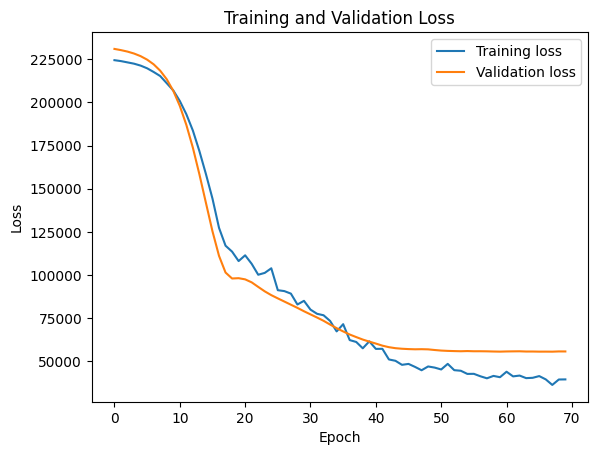

In [ ]:
# Plot the loss for the training and validation sets

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

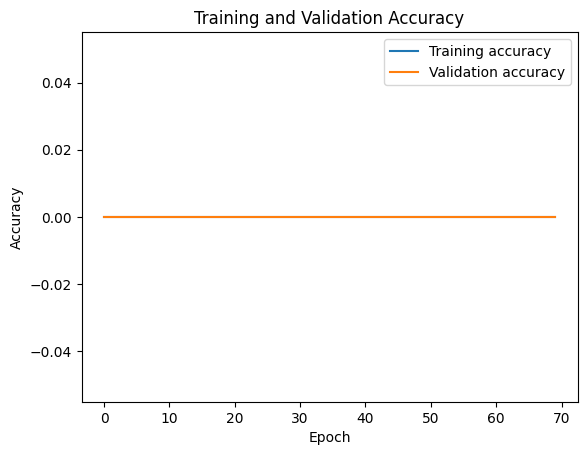

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Oops 🚑🚑🚑

From 2.1 to 2.5, we have proved through multiple experiments that our dataset and data volume are not enough to achieve accurate prediction of comprehensive ranking. Therefore, from Chapter 3 onwards, we will change "Prediction of Comprehensive Ranking" to "Prediction of Ranking Range", i.e., from regression problem to classification problem.

**P.s.** *This change is to effectively avoid the shortcomings of dataset from a practical perspective. This change does not affect our business issues.*

# (3) Ranking Ranges Classification

We have framed the problem as classification prediction. Therefore, some complementary operations are required to continue optimizing our dataset. For example, re-encoding the target column, and remove the impact of unbalanced data.

## 3.1 Supplementary Data Preprocessing

In [ ]:
'''
    Dependent and independent variable settings
'''
# Variables Columns
x = x_aft_preprocessing

# Target Columns
y = y_aft_preprocessing['cat_200'].astype('category')

x, y

(array([[-1.20013316e+00,  9.21155823e-01,  0.00000000e+00, ...,
         -6.80486973e-01, -4.99049628e-01, -6.72421196e-01],
        [ 1.05054727e+00, -1.49483879e+00,  0.00000000e+00, ...,
         -4.17638666e-01, -7.15828356e-01, -9.04486820e-02],
        [-1.20013316e+00, -7.39783035e-01,  0.00000000e+00, ...,
         -2.86214512e-01,  3.58185290e-01, -4.52956421e-02],
        ...,
        [-3.06687454e-01,  1.11619923e+00,  0.00000000e+00, ...,
          1.55372364e+00, -2.06299482e+00, -1.41192765e+00],
        [ 1.05054727e+00,  9.21155823e-01,  0.00000000e+00, ...,
          2.43183535e-15, -1.26039047e+00, -2.37948612e-01],
        [-3.06687454e-01,  1.11619923e+00,  1.00000000e+00, ...,
          2.43183535e-15, -4.91494337e-01, -7.47676263e-01]]),
 0      1
 1      4
 2      3
 3      3
 4      1
       ..
 382    1
 383    2
 384    2
 385    5
 386    2
 Name: cat_200, Length: 387, dtype: category
 Categories (7, int64): [1, 2, 3, 4, 5, 6, 7])

In [ ]:
# Extended encoding of ranking ranges
print(y.describe())
# frequency statistics
print(y.value_counts())

count     387
unique      7
top         2
freq      143
Name: cat_200, dtype: int64
2    143
1     91
3     68
4     43
5     29
6     12
7      1
Name: cat_200, dtype: int64


Target column re-encoding:

1. ranking 1-199, extremely good, total = 91.
2. ranking 200-399, good, total = 143.
3. ranking 400-, needs to be improved, total = 153.

In [ ]:
# Target column re-encoding
target_ranking_range = []
for item in y:
    if item == 1:
        target_ranking_range.append(0)
    elif item == 2:
        target_ranking_range.append(1)
    else:
        target_ranking_range.append(2)

print(len(target_ranking_range), target_ranking_range)

387 [0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2,

In [ ]:
y = pd.DataFrame(target_ranking_range, columns=['ranking_range'])

Target column preprocessing

* Classes balance: SMOTE synthesizes new samples between two minority samples by linear interpolation, which effectively alleviates the overfitting problem caused by random oversampling.
* One-hot encoding

In [ ]:
# Classes balance
'''
    SMOTE
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x, y)

# View the number of categories in the enhanced dataset
print(y_resampled.value_counts())

ranking_range
0                153
1                153
2                153
dtype: int64


In [ ]:
# One-hot encoding
y_resampled_encoded = pd.get_dummies(y_resampled, columns=["ranking_range"])
y_resampled_encoded

,ranking_range_0,ranking_range_1,ranking_range_2
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
454,0,1,0
455,0,1,0
456,0,1,0
457,0,1,0


In [ ]:
'''
    Dependent and independent variable RE-settings
'''
# Variables Columns
x = X_resampled
# Target Columns
y = y_resampled

x, y

(array([[-1.20013316,  0.92115582,  0.        , ..., -0.68048697,
         -0.49904963, -0.6724212 ],
        [ 1.05054727, -1.49483879,  0.        , ..., -0.41763867,
         -0.71582836, -0.09044868],
        [-1.20013316, -0.73978304,  0.        , ..., -0.28621451,
          0.35818529, -0.04529564],
        ...,
        [ 1.05054727, -0.73978304,  0.        , ...,  0.93294948,
          1.29526682,  0.89708361],
        [-0.30668745,  0.85654491,  0.        , ..., -0.95567549,
         -1.11561501, -0.75494656],
        [-0.41377366,  1.09003461,  0.        , ..., -0.26558416,
          0.034283  ,  0.25284147]]),
      ranking_range
 0                0
 1                2
 2                2
 3                2
 4                0
 ..             ...
 454              1
 455              1
 456              1
 457              1
 458              1
 
 [459 rows x 1 columns])

## 3.2 Traditional Classification Models

*Logistic Regression, Decision Trees, Support Vector Machines, Naive Bayes, K-Nearest Neighbors, KNN, Adaboost, etc.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression(multi_class='ovr')
dt = DecisionTreeClassifier()
svm = SVC()
nb = GaussianNB()
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier()

# training
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Predict & Evaluate
models = [lr, dt, svm, nb, knn, adaboost]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'Naive Bayes', 'K-Nearest Neighbors', 'Adaboost']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model in models:
    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 score': f1_scores,
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 score
0  Logistic Regression  0.706522   0.709814  0.706522  0.703983
1        Decision Tree  0.673913   0.682370  0.673913  0.677141
2                  SVM  0.771739   0.775865  0.771739  0.770909
3          Naive Bayes  0.510870   0.637453  0.510870  0.430369
4  K-Nearest Neighbors  0.663043   0.665532  0.663043  0.657468
5             Adaboost  0.684783   0.701708  0.684783  0.677860


As you can see, many of the strategies we’ve employed so far are finally paying off!!!✊🏼

Next, we will use some ensemble learning and neural network methods to write more powerful classification models!

## 3.3 Ensemble Learning

First, we conduct pre-experiments on commonly used ensemble learning methods:
* Random Forest
* Gradient Boosting
* XGBoost
* LightGBM
* CatBoost
* Extremely Randomized Trees

You will see the results below. This experiment is to select the best ensemble learning model on our dataset for further hyperparameter tuning and exploration.

In [ ]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# create a list of classifiers to evaluate
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(),
    ExtraTreesClassifier()
]

# create lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# create a dataframe to store evaluation metrics
results_df = pd.DataFrame({
    'Classifier': ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'ExtraTrees'],
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
})

In [ ]:
print('Evaluation of Ensemble Learning Models:')
results_df

Evaluation of Ensemble Learning Models:


,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.793478,0.793709,0.793478,0.791758
1,Gradient Boosting,0.760870,0.761753,0.760870,0.761188
2,XGBoost,0.760870,0.759406,0.760870,0.758998
3,LightGBM,0.793478,0.792185,0.793478,0.792230
4,CatBoost,0.815217,0.816740,0.815217,0.813742
5,ExtraTrees,0.826087,0.824445,0.826087,0.824016


In [ ]:
# from 3.2
print('Evaluation of Traditional ML Models:')
results

Evaluation of Traditional ML Models:


,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.706522,0.709814,0.706522,0.703983
1,Decision Tree,0.673913,0.682370,0.673913,0.677141
2,SVM,0.771739,0.775865,0.771739,0.770909
3,Naive Bayes,0.510870,0.637453,0.510870,0.430369
4,K-Nearest Neighbors,0.663043,0.665532,0.663043,0.657468
5,Adaboost,0.684783,0.701708,0.684783,0.677860


👆So excited! As you can see, compare to traditional ML methods, these six ensemble learning models have better performance! Especially CatBoost and ExtraTrees!

Next, in 3.4, we will use Extremely Randomized Trees as the baseline model, and continue to add tricks such as hyperparameter adjustment to make it have better performance.

## 3.4 Extremely Randomized Trees

After experiments, we found that the generalization ability of the model will drop by about 8% after one-hot encoding of the target column. So we canceled this trick (in all parts).

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# one-hot encoding
# onehot_data = pd.get_dummies(y, columns=['ranking_range'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(x, onehot_data, test_size=0.2, random_state=42)

model = ExtraTreesClassifier()

param_space = {
    'n_estimators': [240, 250, 260, 270, 280, 290, 300],
    'max_depth': [None, 5, 7, 9, 11, 13, 15, 17, 20],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 10],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}

# K-fold cross-validation
cv = 5

# random search
random_search = RandomizedSearchCV(model, param_distributions=param_space, n_iter=50, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
y_pred = random_search.predict(X_test)

Best Hyperparameters: {'n_estimators': 280, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8369565217391305
Precision: 0.8351245050551647
Recall: 0.8369565217391305
F1 Score: 0.8350842945874001


>Accuracy: 0.8369565217391305
>
>Precision: 0.8351245050551647
>
>Recall: 0.8369565217391305
>
>F1 Score: 0.8350842945874001

We are satisfied with this effect given the limited amount of data.

## 3.5 Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 定义神经网络模型
def create_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    return model

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Convert the target variable to a categorical variable
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# training
model = create_model(X_train.shape[1], y_train_cat.shape[1])
history = model.fit(X_train, y_train_cat, epochs=150, batch_size=256, validation_data=(X_test, y_test_cat))

Epoch 1/150
2/2 [==============================] - 3s 651ms/step - loss: 1.0611 - accuracy: 0.4308 - val_loss: 0.9377 - val_accuracy: 0.5217
Epoch 2/150
2/2 [==============================] - 0s 58ms/step - loss: 0.9966 - accuracy: 0.5282 - val_loss: 0.8861 - val_accuracy: 0.5942
Epoch 3/150
2/2 [==============================] - 0s 76ms/step - loss: 0.9722 - accuracy: 0.5026 - val_loss: 0.8777 - val_accuracy: 0.5942
Epoch 4/150
2/2 [==============================] - 0s 87ms/step - loss: 0.9154 - accuracy: 0.5333 - val_loss: 0.8485 - val_accuracy: 0.6522
Epoch 5/150
2/2 [==============================] - 0s 115ms/step - loss: 0.8978 - accuracy: 0.5821 - val_loss: 0.8426 - val_accuracy: 0.6377
Epoch 6/150
2/2 [==============================] - 0s 109ms/step - loss: 0.8456 - accuracy: 0.5974 - val_loss: 0.8206 - val_accuracy: 0.6232
Epoch 7/150
2/2 [==============================] - 0s 106ms/step - loss: 0.8618 - accuracy: 0.6205 - val_loss: 0.8090 - val_accuracy: 0.6812
Epoch 8/150
2/2 

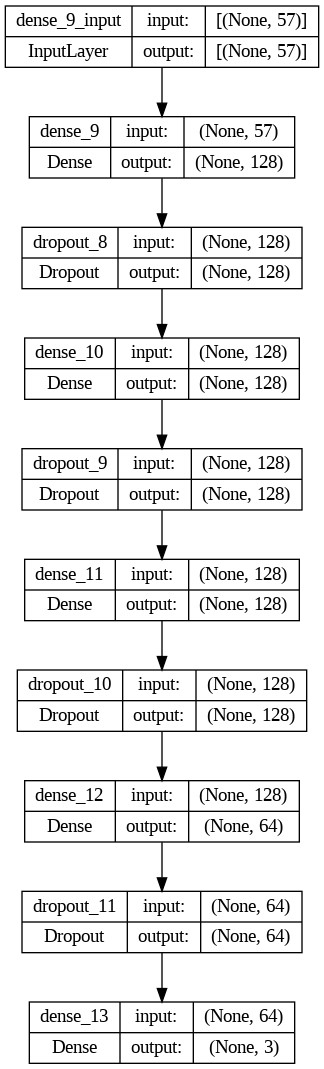

In [ ]:
# NN model visualization
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes='Ture')

In [ ]:
# classification report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.74      0.77      0.75        26
           2       0.69      0.60      0.64        15

    accuracy                           0.75        69
   macro avg       0.74      0.73      0.73        69
weighted avg       0.75      0.75      0.75        69



In [ ]:
# Moving average function
def smooth_curve(points, factor=0.9):
    smoothed_points = np.zeros_like(points)
    for i, point in enumerate(points):
        if i == 0:
            smoothed_points[i] = point
        else:
            smoothed_points[i] = smoothed_points[i-1] * factor + point * (1 - factor)
    return smoothed_points

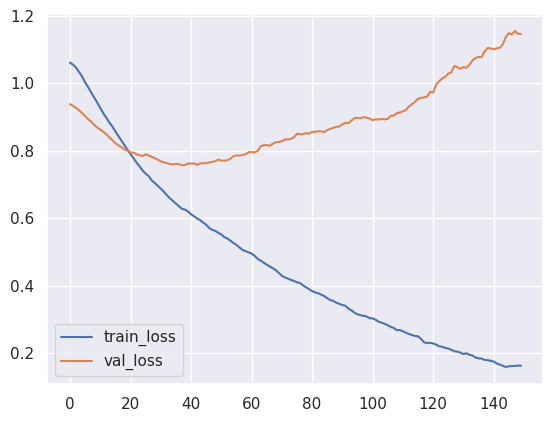

In [ ]:
# Plot the loss function and accuracy
plt.plot(smooth_curve(history.history['loss']), label='train_loss')
plt.plot(smooth_curve(history.history['val_loss']), label='val_loss')
plt.legend()
plt.show()

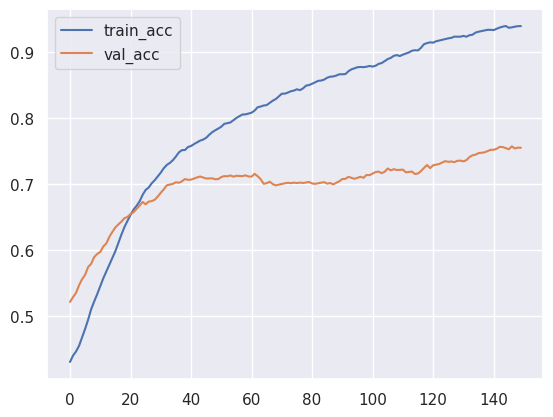

In [ ]:
plt.plot(smooth_curve(history.history['accuracy']), label='train_acc')
plt.plot(smooth_curve(history.history['val_accuracy']), label='val_acc')
plt.legend()
plt.show()